# Q-Learning - Frozen Lake

In [14]:
import numpy as np
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np
import math
import copy

In [127]:
class Environment:
    def __init__(self, width, height, start, goal):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.gameOver=False
        self.actor_position = start
        self.airCurrentsColumns=[3,4,5]
        self.airCurrentsProbs={3:0.9,4:0.8,5:0.9}
        self.airCurrentsStrength={3:1,4:2,5:1}
        self.goalReward=10
        self.normalBoxReward=-1
        self.penaltyFalling=-2
        

    def reset(self):
        self.gameOver=False
        self.actor_position = self.start
        return self.__getCurrentState__()
    
    def move_up(self,canGetOutOfTheMap=False):
        if self.actor_position[1] > 0 or canGetOutOfTheMap:
            self.actor_position = (self.actor_position[0], self.actor_position[1] - 1)

    def move_right(self):
        if self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1])

    def move_down(self):
        if self.actor_position[1] < self.height - 1:
            self.actor_position = (self.actor_position[0], self.actor_position[1] + 1)

    def move_left(self):
        if self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1])

    def move_up_left(self):
        if self.actor_position[1] > 0  and self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1] - 1)
    def move_down_left(self):
        if self.actor_position[1] < self.height - 1 and self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1] + 1)
    def move_down_right(self):
        if self.actor_position[1] < self.height - 1 and self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1] + 1)
    def move_up_right(self):
        if self.actor_position[1] > 0 and self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1] - 1)


    
    def doAction(self,action):
        if int(action) == 0:
            env.move_up()
        elif int(action) == 1:
            env.move_up_right()
        elif int(action) == 2:
            env.move_right()
        elif int(action) == 3:
            env.move_down_right()
        elif int(action) == 4:
            env.move_down()
        elif int(action) == 5:
            env.move_down_left()
        elif int(action) == 6:
            env.move_left()
        elif int(action) == 7:
            env.move_up_left()
    
    def moveAirCurrent(self):
        if self.actor_position[0] in self.airCurrentsColumns:
            rand=random.random()
            if rand<=self.airCurrentsProbs[self.actor_position[0]]:
                for _ in range(self.airCurrentsStrength[self.actor_position[0]]):
                    self.move_up(canGetOutOfTheMap=True)
                    
                    
                
    def __getCurrentState__(self):
        return self.width*self.actor_position[1]+self.actor_position[0]
    
    def calculateReward(self):
        if self.actor_position == self.goal:
            self.gameOver=True 
            return self.goalReward
        elif self.actor_position[1]<0:
            self.gameOver=True 
            return self.penaltyFalling
        else:
            return self.normalBoxReward
    
    def step(self,action):
        self.doAction(action)
        self.moveAirCurrent()
        
        reward=self.calculateReward()
        return self.__getCurrentState__(),reward,self.gameOver
    
    def render(self):
        for row in range(self.height):
            for col in range(self.width):
                if (col, row) == self.actor_position:
                    print("S", end=" ")
                elif (col, row) == self.goal:
                    print("G", end=" ")
                else:
                    print(".", end=" ")
            print()


In [128]:
env = Environment(9,7, (1,1), (7, 4))
env.render()

while 1:
    action = input("Enter action (up, upright, right, downright, down, downleft, left, upleft): ")
    new_state, reward, done=env.step(action)
    print(reward)
    print(done)
    env.render()

print("Goal reached!")

. . . . . . . . . 
. S . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . G . 
. . . . . . . . . 
. . . . . . . . . 


KeyboardInterrupt: Interrupted by user

Create game environment for frozen lake.

In [129]:
env = Environment(9,7, (1,1), (7, 4))


Render the environment:

In [130]:
env.reset()                    
env.render()

. . . . . . . . . 
. S . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . G . 
. . . . . . . . . 
. . . . . . . . . 


# Complete the code

Initialize some parameters.

In [145]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_tableOrig =  [[0] * 8 for _ in range(9*7)]

Run Q-Learning algorithm:

In [146]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
rewards_avg=[]
for it in range(50):
    print('average ', it)
    rewards_all_episodes=[]
    
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.0005
    
    q_table = [[0] * 8 for _ in range(9*7)]
    # iterate over the episodes
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        currentQTable=copy.deepcopy(q_table)
        rewards_current_episode = 0
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.random()
            if exploration_rate_threshold <= exploration_rate:
                action = random.randint(0,7)
            else:
                action = np.argmax(currentQTable[state])

            # Take action
            new_state, reward, done = env.step(action)
            """if done==True and reward==0:
                reward=-1
            elif reward==0:
                reward=0
            else:
                reward=1"""
            #reward-=step*0.05
            # Update Q-table for Q(s,a)  
            value=(1-learning_rate)*currentQTable[state][action]+learning_rate*(reward+discount_rate*max(currentQTable[new_state]))
            
            q_table[state][action] = value
            
            # transition next state
            state = new_state
            rewards_current_episode += reward
            if done == True:
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate+(max_exploration_rate-min_exploration_rate)*pow(math.e,(-exploration_decay_rate*episode))

        rewards_all_episodes.append(rewards_current_episode)
    #print(q_table)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9
average  10
average  11
average  12
average  13
average  14
average  15
average  16
average  17
average  18
average  19
average  20
average  21
average  22
average  23
average  24
average  25
average  26
average  27
average  28
average  29
average  30
average  31
average  32
average  33
average  34
average  35
average  36
average  37
average  38
average  39
average  40
average  41
average  42
average  43
average  44
average  45
average  46
average  47
average  48
average  49


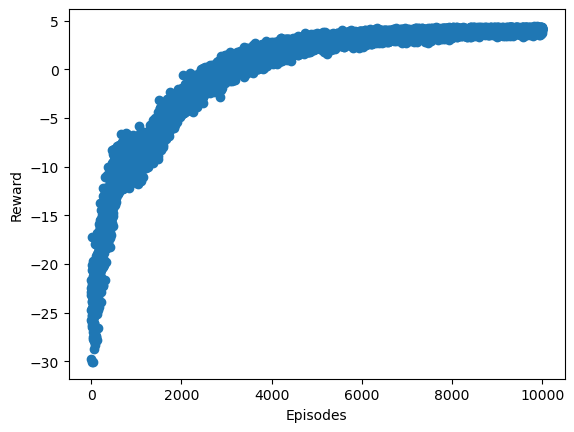

In [147]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


In [148]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[-0.24852173801877991, -0.3030311642782833, 0.12594986978487077, 1.3377823330331322, 0.5372481026497844, -0.10561995532717591, 0.006347457631291291, 0.16629517184812817], [0.22452585286547513, -0.015045261216629774, 0.3291052210362113, 1.3409892538366908, 0.6568468780631067, 0.5876086269385437, 0.1454517977143507, 0.1307466245546665], [0.2767361487004605, 0.26666837665730814, -0.15384550832507674, 0.354578134337906, 1.3992842994730328, 1.267651744882573, 0.1819333548689253, 0.16521384407361098], [-0.17868226676141183, -0.25144200213891066, 1.2741584949813354, 0.2947470422867597, 0.39988526002536906, 1.3436071379905248, 0.23576270119392445, -0.06546979821355313], [1.983946108120847, 1.5861434938311103, -0.4777514868975967, 4.600928289534647, 1.1202088133737595, 0.654325696074331, -0.06635710818733034, 1.643372735357714], [-1.6734395639250663, -0.7128263870532332, 4.432148912630938, 5.721249999999992, 4.643288727755077, -0.7309623521403072, 1.4774626456040587,

watch it play!

In [149]:
for episode in range(3):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state])   
        
        new_state, reward, done = env.step(action)
        clear_output(wait=True)
        print(action)
        env.render()
        if done:
            
            if reward == 10:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state

4
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . S . 
. . . . . . . . . 
. . . . . . . . . 
****You reached the goal!****
